In [5]:
import os 
import shutil
from PIL import Image
import numpy as np

In [7]:
base_dir  = 'sample_data'
class1_dir = os.path.join(base_dir, 'class1')
class2_dir = os.path.join(base_dir, 'class2')

os.makedirs(class1_dir, exist_ok= True)
os.makedirs(class2_dir, exist_ok= True)

def generate_random_images(save_dir, num_images):
    for i in range(num_images):
        img = Image.fromarray(np.uint8(np.random.rand(224, 224, 3) *255))
        img.save(os.path.join(save_dir, f'image_{i}.jpg')) 
        
num_images_per_class = 100
generate_random_images(class1_dir, num_images_per_class)
generate_random_images(class2_dir, num_images_per_class)

print(f'Sample data generated at {base_dir} with {num_images_per_class} images per class.')

Sample data generated at sample_data with 100 images per class.


In [9]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False
    
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer = Adam(learning_rate = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])


In [11]:
train_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = train_datagen.flow_from_directory(
    'sample_data',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'binary'
)

model.fit(train_generator, epochs = 10)

for layer in base_model.layers[-4:]:
    layer.trainable= True
    
model.compile(optimizer= Adam(learning_rate=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])


Found 200 images belonging to 2 classes.


c:\Users\parid\anaconda3\envs\Rohit\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.4600 - loss: 1.5341
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.4900 - loss: 0.7568
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 25s 4s/step - accuracy: 0.5250 - loss: 0.7548
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 28s 4s/step - accuracy: 0.5000 - loss: 0.7411
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 28s 4s/step - accuracy: 0.5300 - loss: 0.7033
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 27s 4s/step - accuracy: 0.5050 - loss: 0.6895
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 27s 4s/step - accuracy: 0.5050 - loss: 0.6820
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 42s 4s/step - accuracy: 0.5450 - loss: 0.6740
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 28s 4s/step - accuracy: 0.6850 - loss: 0.6667
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 28s 4s/step - accuracy: 0.5050 - loss: 0.6727


In [12]:
model.fit(train_generator, epochs = 10)

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 0.5650 - loss: 0.7409
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.5450 - loss: 0.6874
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.5450 - loss: 0.6765
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.5150 - loss: 0.6877
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.5550 - loss: 0.6806
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.7100 - loss: 0.6566
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.7700 - loss: 0.6371
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.8400 - loss: 0.6106
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.8800 - loss: 0.5728
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.8650 - loss: 0.5245


In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

#load and process the image 
img = load_img('sample.jpg', target_size =(224, 224))
img_array = img_to_array(img)
img_array = tf.expand_dims(img_array, 0)


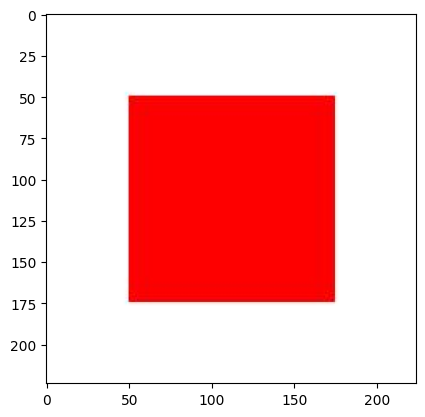

In [2]:
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()

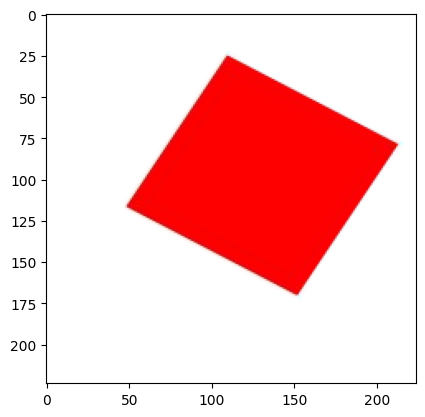

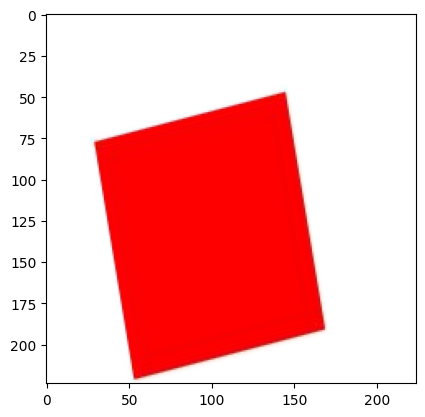

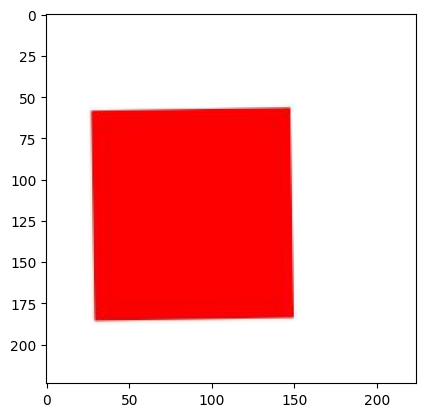

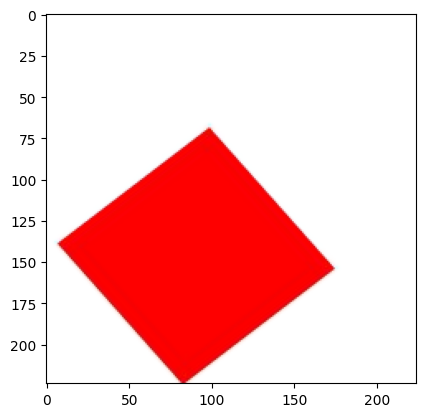

In [4]:
datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range  =0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

img = load_img('sample.jpg')
x = img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size = 1):
    plt.figure(i)
    imgplot= plt.imshow(tf.keras.preprocessing.image.array_to_img(batch[0]))
    i +=1
    if i %4 ==0:
        break 
plt.show()